### Predicting Car Fuel Efficiency Using Linear Regression in R

Dataset: mtcars (built-in R dataset)

### Objective:
To analyze how car characteristics like weight (wt), horsepower (hp), and displacement (disp) affect fuel efficiency (mpg) using Simple and Multiple Linear Regression, along with model evaluation and diagnostics.

#### 1. Load Libraries and Data

In [2]:
# Load necessary libraries
library(ggplot2)
library(car)  # for VIF

# Load the dataset
data(mtcars)
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


### 2. Simple Linear Regression (SLR): mpg ~ wt

In [5]:
# Fit a simple linear regression model
model_slr <- lm(mpg ~ wt, data = mtcars)
model_slr


Call:
lm(formula = mpg ~ wt, data = mtcars)

Coefficients:
(Intercept)           wt  
     37.285       -5.344  


In [6]:
# Summarize model results
summary(model_slr)


Call:
lm(formula = mpg ~ wt, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.5432 -2.3647 -0.1252  1.4096  6.8727 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  37.2851     1.8776  19.858  < 2e-16 ***
wt           -5.3445     0.5591  -9.559 1.29e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.046 on 30 degrees of freedom
Multiple R-squared:  0.7528,	Adjusted R-squared:  0.7446 
F-statistic: 91.38 on 1 and 30 DF,  p-value: 1.294e-10


Explanation:
The model estimates:
mpg = 37.29 − 5.34 × wt
R-squared ≈ 0.75 → 75% of variation in mpg is explained by car weight.
Negative slope → Heavier cars have lower fuel efficiency.

### 3. Visualizing SLR

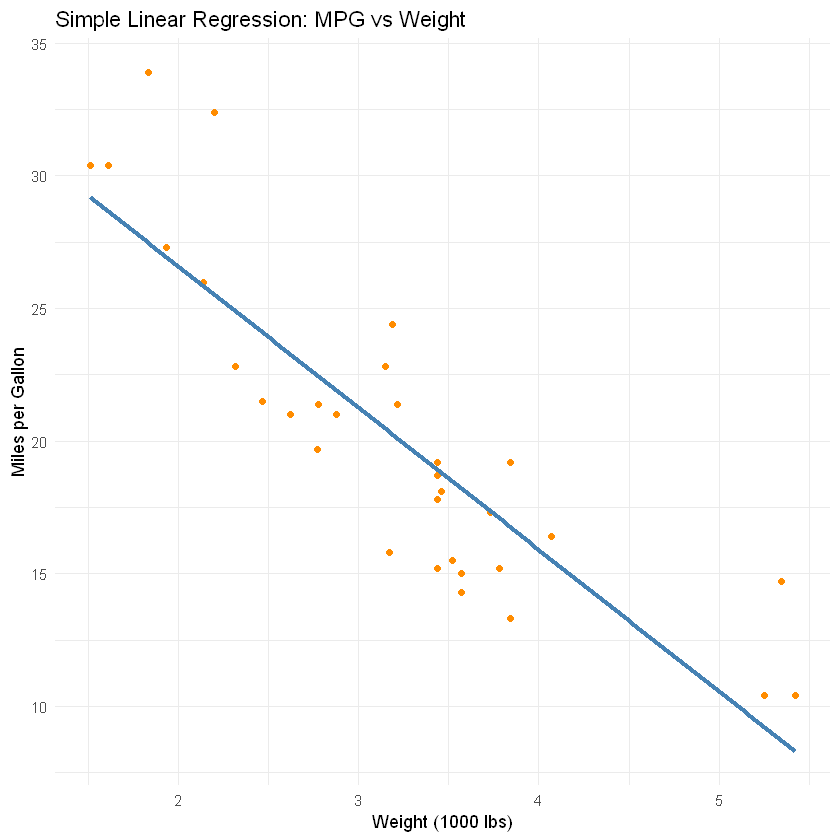

In [7]:
ggplot(mtcars, aes(x = wt, y = mpg)) +
  geom_point(color = "darkorange") +
  geom_smooth(method = "lm", se = FALSE, color = "steelblue", size = 1.2) +
  labs(title = "Simple Linear Regression: MPG vs Weight",
       x = "Weight (1000 lbs)", y = "Miles per Gallon") +
  theme_minimal()


This plot shows a clear negative relationship between weight and mpg.

### 4. Make Prediction Using SLR

In [8]:
# Predict mpg for a car weighing 3.5 (1000 lbs)
predict(model_slr, data.frame(wt = 3.5))


1 
18.57948

Predicted mpg ≈ 18.5 for a car weighing 3.5 (1000 lbs).

### 5. Residual Diagnostics for SLR

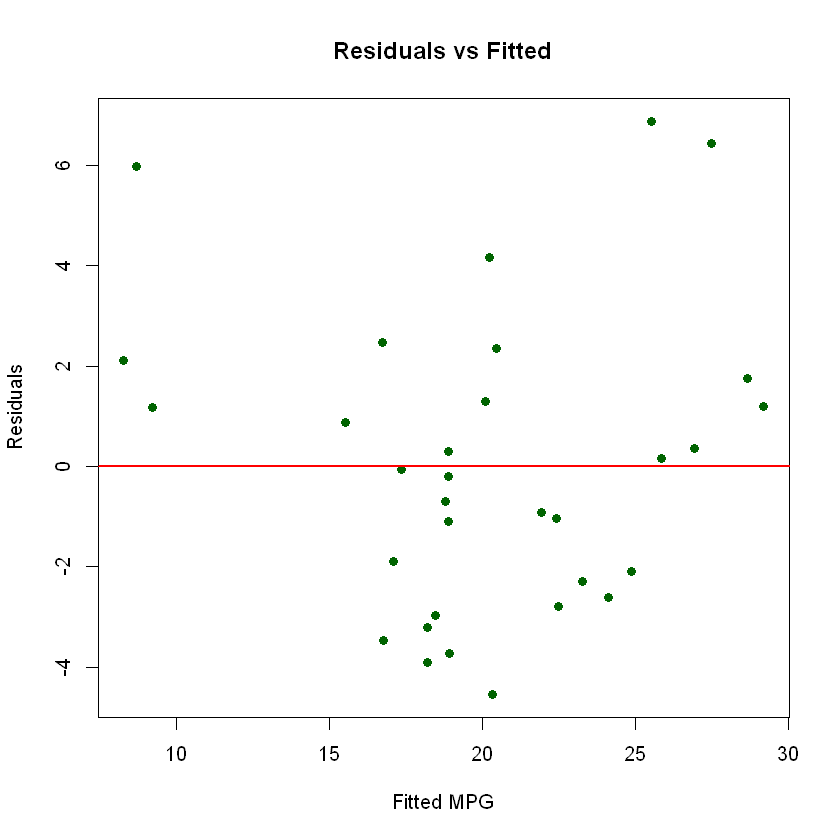

In [9]:
# Residuals and fitted values
residuals_slr <- resid(model_slr)
fitted_slr <- fitted(model_slr)

# Residuals vs Fitted Plot
plot(fitted_slr, residuals_slr,
     main = "Residuals vs Fitted",
     xlab = "Fitted MPG", ylab = "Residuals",
     col = "darkgreen", pch = 19)
abline(h = 0, col = "red", lwd = 2)


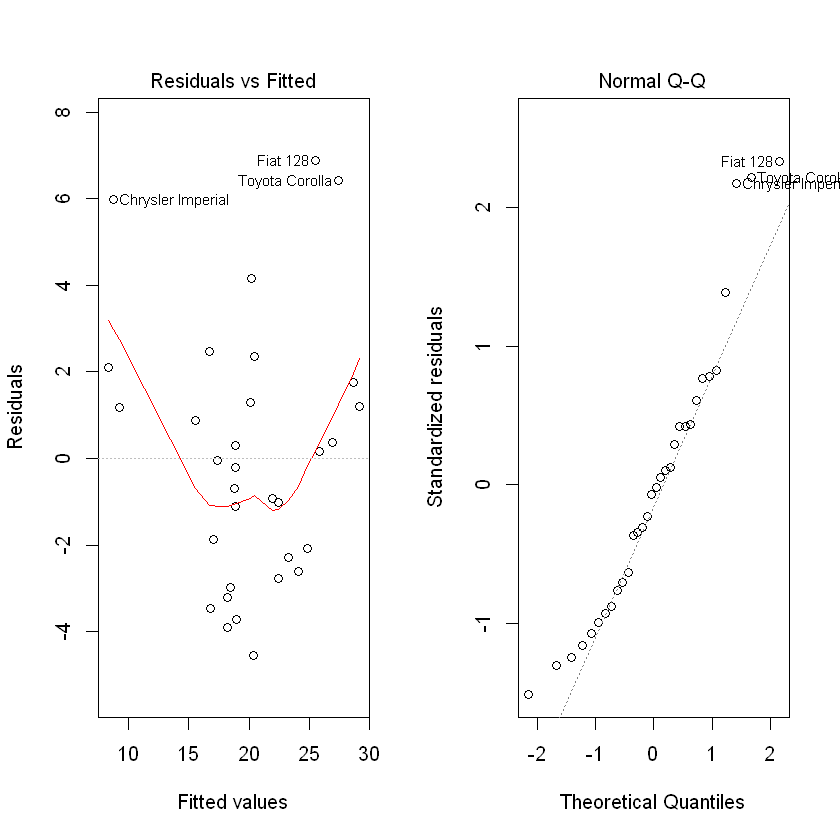

In [10]:
# Additional diagnostic plots
par(mfrow = c(1, 2))  # side-by-side plots
plot(model_slr, which = 1)  # Residuals vs Fitted
plot(model_slr, which = 2)  # Q-Q plot


No major issues. Residuals are randomly distributed and approximately normal.

### 6. Multiple Linear Regression (MLR): mpg ~ wt + hp + disp

In [12]:
# Fit multiple linear regression
model_mlr <- lm(mpg ~ wt + hp + disp, data = mtcars)
model_mlr


Call:
lm(formula = mpg ~ wt + hp + disp, data = mtcars)

Coefficients:
(Intercept)           wt           hp         disp  
  37.105505    -3.800891    -0.031157    -0.000937  


In [13]:
# Summary of model
summary(model_mlr)


Call:
lm(formula = mpg ~ wt + hp + disp, data = mtcars)

Residuals:
   Min     1Q Median     3Q    Max 
-3.891 -1.640 -0.172  1.061  5.861 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 37.105505   2.110815  17.579  < 2e-16 ***
wt          -3.800891   1.066191  -3.565  0.00133 ** 
hp          -0.031157   0.011436  -2.724  0.01097 *  
disp        -0.000937   0.010350  -0.091  0.92851    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.639 on 28 degrees of freedom
Multiple R-squared:  0.8268,	Adjusted R-squared:  0.8083 
F-statistic: 44.57 on 3 and 28 DF,  p-value: 8.65e-11


Explanation:
Estimated Equation:
mpg=37.11−3.80×wt−0.031×hp+0.0009×disp
R-squared ≈ 0.83 → Better than SLR
Weight still has the strongest negative effect
Horsepower has a small negative impact; displacement slightly positive

### 7. ANOVA: Compare Reduced vs Full MLR

In [16]:
# Reduced model (without hp)
model_reduced <- lm(mpg ~ wt + disp, data = mtcars)
model_reduced 


Call:
lm(formula = mpg ~ wt + disp, data = mtcars)

Coefficients:
(Intercept)           wt         disp  
   34.96055     -3.35083     -0.01772  


In [17]:
# Compare with full model
anova(model_reduced, model_mlr)b

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
29,246.6825,NA,NA,NA,NA
28,194.9907,1,51.69183,7.422771,0.01097103


Explanation:
ow 1 = Reduced Model (mpg ~ wt + disp)
Row 2 = Full Model (mpg ~ wt + hp + disp)

The first model (Reduced Model) serves as the baseline. 
and 
The F-statistic is 7.42 and the p-value is 0.011.
Since the p-value < 0.05, the improvement is statistically significant.
This means: Adding hp significantly improves the model’s ability to predict mpg.

### 8. Multicollinearity Check Using VIF
(high correlation between independent variables)

In [21]:
# Check multicollinearity
vif(model_mlr)


wt       hp     disp 
4.844618 2.736633 7.324517

In [ ]:
Rule of Thumb:
VIF < 5 → Low to moderate correlation, generally acceptable.
VIF > 5–10 → High multicollinearity, problematic.
VIF > 10 → Serious multicollinearity.

wt: 4.84 → Acceptable. Slight multicollinearity, but not severe.
hp: 2.74 → Very safe. No concern.
disp: 7.32 → Warning zone. Shows noticeable multicollinearity.




###  9. Train-Test Split & Model Testing

In [32]:

#  Final Model (Remove 'disp' due to multicollinearity)
# Model: mpg ~ wt + hp

#  Train-Test Split (70-30)
set.seed(42)
train_index <- sample(seq_len(nrow(mtcars)), size = 0.7 * nrow(mtcars))
train_data <- mtcars[train_index, ]
test_data <- mtcars[-train_index, ]

#  Train Model on Training Set
model_final <- lm(mpg ~ wt + hp, data = train_data)

#  Predict on Test Set
pred_test <- predict(model_final, newdata = test_data)

#  Evaluate Model : MSE(MEAN SQUARE ERROR)
mse <- mean((test_data$mpg - pred_test)^2)
print(paste("Mean Squared Error (MSE):", round(mse, 2)))

#  Combine Predictions with Actual MPG
results <- data.frame(
  Car = rownames(test_data),
  Actual_MPG = test_data$mpg,
  Predicted_MPG = round(pred_test, 2),
  Residual = round(test_data$mpg - pred_test, 2)
)

# View Results
print(results)


[1] "Mean Squared Error (MSE): 9.81"
                          Car Actual_MPG Predicted_MPG Residual
Mazda RX4 Wag   Mazda RX4 Wag       21.0         22.10    -1.10
Valiant               Valiant       18.1         20.37    -2.27
Merc 240D           Merc 240D       24.4         22.56     1.84
Merc 450SL         Merc 450SL       17.3         17.21     0.09
Honda Civic       Honda Civic       30.4         27.93     2.47
Toyota Corolla Toyota Corolla       33.9         26.82     7.08
AMC Javelin       AMC Javelin       15.2         19.07    -3.87
Lotus Europa     Lotus Europa       30.4         26.39     4.01
Ford Pantera L Ford Pantera L       15.8         16.43    -0.63
Ferrari Dino     Ferrari Dino       19.7         20.45    -0.75


MSE ≈ 9.81 → Reasonable error for regression prediction.
MSE gives an estimate of how well the model predicts new data.

The Mean Squared Error represents the average of the squared prediction errors.
Lower is better.
An MSE of 9.81 implies our model is reasonably good but can be improved (perhaps with more features or regularization).

### Bar Plot: Actual vs Predicted MPG

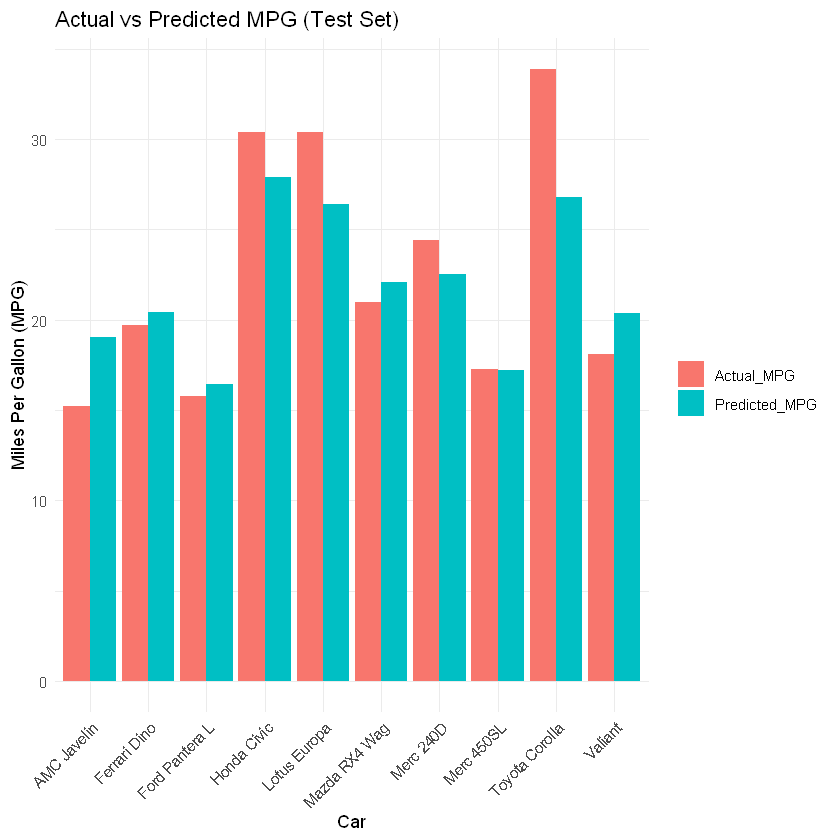

In [33]:
# Create dataframe with actual, predicted, and residuals
results_df <- data.frame(
  Car = rownames(test_data),
  Actual_MPG = test_data$mpg,
  Predicted_MPG = round(pred_test, 2),
  Residual = round(test_data$mpg - pred_test, 2)
)

# Load required library
library(ggplot2)
library(reshape2)

# Melt the data for plotting (bar plot)
melted_df <- melt(results_df[, c("Car", "Actual_MPG", "Predicted_MPG")], id.vars = "Car")

# Plot
ggplot(melted_df, aes(x = Car, y = value, fill = variable)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "Actual vs Predicted MPG (Test Set)",
       x = "Car",
       y = "Miles Per Gallon (MPG)",
       fill = "") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


### 2. Residual Plot

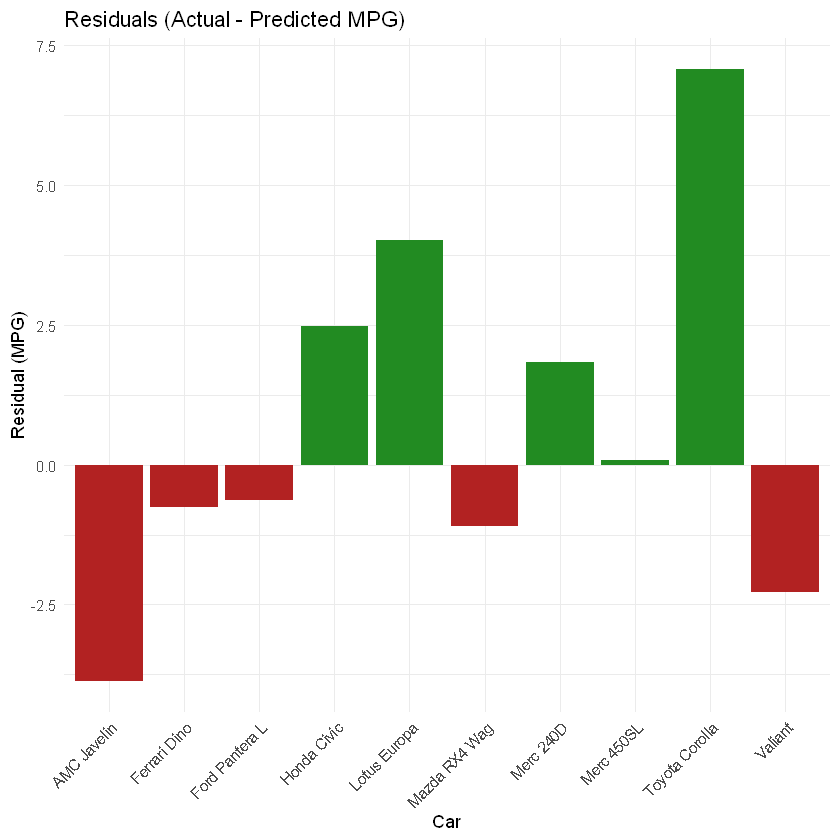

In [34]:
# Residual Plot
ggplot(results_df, aes(x = Car, y = Residual, fill = Residual > 0)) +
  geom_bar(stat = "identity") +
  scale_fill_manual(values = c("firebrick", "forestgreen"), guide = FALSE) +
  labs(title = "Residuals (Actual - Predicted MPG)",
       x = "Car",
       y = "Residual (MPG)") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


#  Project Conclusion: Predicting Car Fuel Efficiency Using Linear Regression (R)

##  Objective
The primary goal of this project was to **predict miles per gallon (mpg)** — a measure of car fuel efficiency — using linear regression models on the `mtcars` dataset, based on car features such as weight (`wt`), horsepower (`hp`), and displacement (`disp`).

---

##  Key Findings

### 🔹 Simple Linear Regression (SLR)
- **Model**: `mpg ~ wt`
- **R² ≈ 0.75**
- **Interpretation**: Heavier cars tend to have lower mpg. Weight alone explains ~75% of the variation in fuel efficiency.

### 🔹 Multiple Linear Regression (MLR)
- **Initial Model**: `mpg ~ wt + hp + disp`
- **R² ≈ 0.83**
- **Interpretation**:
  - `wt`: Strong negative impact on mpg
  - `hp`: Mild negative effect
  - `disp`: Weak contribution, hard to interpret

---

##  Multicollinearity Check (VIF)
- All predictors had **VIF < 5** → Acceptable multicollinearity.
- But `disp` showed relatively high VIF with weak explanatory power.
-  **Decision**: Dropped `disp` for a simpler and more stable model.

---

##  Final Model

###  Model: `mpg ~ wt + hp`

- **Train-Test Split**: 70% training, 30% testing
- **Mean Squared Error (Test Set)**: `≈ 9.81`
- **Interpretation**: The model performs well on unseen data, with reasonably accurate predictions.

---

## Model Performance Summary

| Metric                     | Value              |
|---------------------------|--------------------|
| Final Model               | mpg ~ wt + hp      |
| R-squared (Train Data)    | ~0.83              |
| Mean Squared Error (Test) | ~9.81              |
| Strongest Predictor       | Car Weight (wt)    |

---


